In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import rc
data_csv = pd.read_csv('C:/Project/Data/data.csv', encoding='euc-kr')
data_csv = data_csv.apply(pd.to_numeric, errors='coerce').fillna(0)
data_csv = data_csv.astype({'temp':'float32'})
data_csv = data_csv.astype({'visiblity':'float32'})
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143244 entries, 0 to 143243
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cloud          143244 non-null  int64  
 1   min_cloud_hei  143244 non-null  int64  
 2   rain           143244 non-null  int64  
 3   temp           143244 non-null  float32
 4   visiblity      143244 non-null  float32
 5   wind_dire      143244 non-null  int64  
 6   wind_spd       143244 non-null  int64  
 7   class          143244 non-null  int64  
dtypes: float32(2), int64(6)
memory usage: 7.7 MB


C:\Users\Jeon\AppData\Local\Temp\ipykernel_2716\2889179905.py:10: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv('C:/Project/Data/data.csv', encoding='euc-kr')


In [10]:
data_csv.describe()

,cloud,min_cloud_hei,rain,temp,visiblity,wind_dire,wind_spd,class
count,143244.000000,143244.000000,143244.000000,143244.000000,143244.000000,143244.000000,143244.000000,143244.000000
mean,5.429219,47.870396,0.711625,16.997086,857.024353,20.615467,10.928290,0.486582
std,2.653740,63.284277,3.731022,8.930216,257.020874,11.320337,7.753975,0.499822
min,0.000000,0.000000,0.000000,-2.900000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,10.000000,0.000000,10.800000,800.000000,9.000000,5.000000,0.000000
50%,7.000000,25.000000,0.000000,18.400000,1000.000000,23.000000,8.000000,0.000000
75%,8.000000,40.000000,0.000000,24.400000,1000.000000,31.000000,15.000000,1.000000
max,8.000000,240.000000,57.000000,35.799999,1000.000000,36.000000,43.000000,1.000000


In [11]:
data_csv.shape

(143244, 8)

In [12]:
data_csv.columns

Index(['cloud', 'min_cloud_hei', 'rain', 'temp', 'visiblity', 'wind_dire',
       'wind_spd', 'class'],
      dtype='object')

[Text(0.5, 0, 'cloud'),
 Text(1.5, 0, 'min_cloud_hei'),
 Text(2.5, 0, 'rain'),
 Text(3.5, 0, 'temp'),
 Text(4.5, 0, 'visiblity'),
 Text(5.5, 0, 'wind_dire'),
 Text(6.5, 0, 'wind_spd'),
 Text(7.5, 0, 'class')]

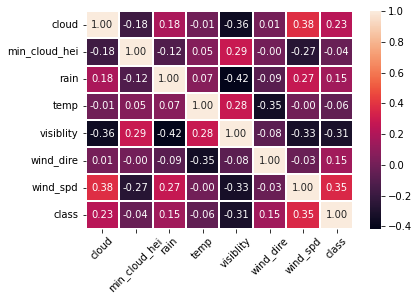

In [13]:
heat_map = sns.heatmap(data_csv.corr(method='pearson'),annot=True, fmt='.2f',linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)

In [240]:
feature_columns = []
for header in ['cloud','min_cloud_hei','rain','temp','visiblity','wind_dire','wind_spd']:
    feature_columns.append(tf.feature_column.numeric_column(header))

In [241]:
def create_dataset(dataframe, batch_size=40):
    dataframe = dataframe.copy()            
    labels = dataframe.pop('class')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe),labels)).shuffle(buffer_size=len(dataframe))\
    .batch(batch_size)


In [242]:
train, test = train_test_split(data_csv, test_size=0.3)
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [243]:
model = tf.keras.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [244]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
history=model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
2490/2507 [============================>.] - ETA: 0s - loss: 3.3534 - accuracy: 0.6462WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'cloud': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'min_cloud_hei': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=int64>, 'rain': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'temp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float32>, 'visiblity': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float32>, 'wind_dire': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'wind_spd': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>}
Consider rewriting this model with the Functional API.
2507/2507 [==============================] - 3s 1ms/step - loss: 3.3349 - accuracy: 0.6465 - val_loss: 0.6043 - val_accur

Epoch 43/100
2507/2507 [==============================] - 3s 1ms/step - loss: 0.4997 - accuracy: 0.7574 - val_loss: 0.4955 - val_accuracy: 0.7527
Epoch 44/100
2507/2507 [==============================] - 4s 1ms/step - loss: 0.4976 - accuracy: 0.7582 - val_loss: 0.4851 - val_accuracy: 0.7583
Epoch 45/100
2507/2507 [==============================] - 3s 1ms/step - loss: 0.4996 - accuracy: 0.7579 - val_loss: 0.4910 - val_accuracy: 0.7509
Epoch 46/100
2507/2507 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.7583 - val_loss: 0.4814 - val_accuracy: 0.7696
Epoch 47/100
2507/2507 [==============================] - 3s 1ms/step - loss: 0.4973 - accuracy: 0.7597 - val_loss: 0.4755 - val_accuracy: 0.7661
Epoch 48/100
2507/2507 [==============================] - 4s 1ms/step - loss: 0.4972 - accuracy: 0.7602 - val_loss: 0.4791 - val_accuracy: 0.7697
Epoch 49/100
2507/2507 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.7571 - val_loss: 0.4835 -

2507/2507 [==============================] - 5s 2ms/step - loss: 0.4941 - accuracy: 0.7634 - val_loss: 0.4905 - val_accuracy: 0.7555
Epoch 100/100
2507/2507 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.7628 - val_loss: 0.4764 - val_accuracy: 0.7696


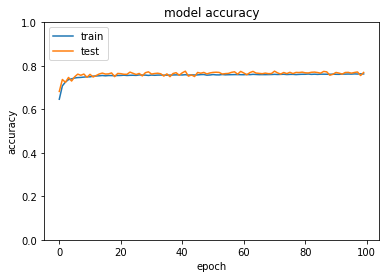

In [245]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train','test'],loc='upper left');

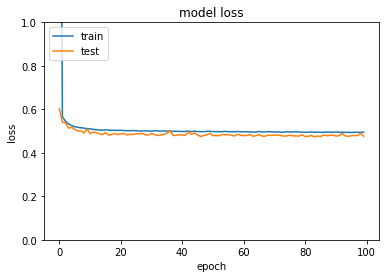

In [246]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,1))
plt.legend(['train','test'],loc='upper left');